#CS598 PSL — Assignment 1 — Problem 1

Group Members: Rahul Kasibhatla, Neeyati Devanagondi, Manas Gandhi

###Question 1

Optimal k (Gap Statistic): 10


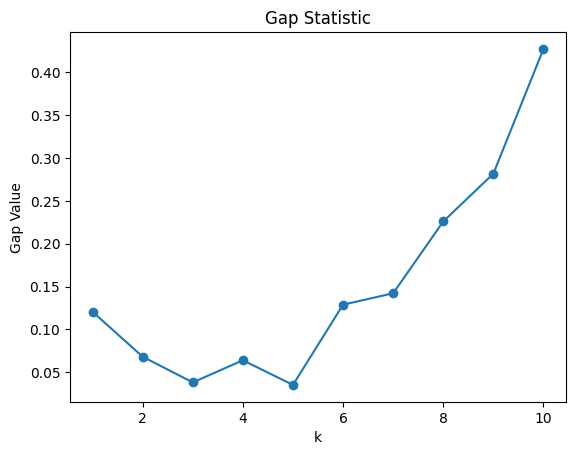

Optimal k (Silhouette Score): 10


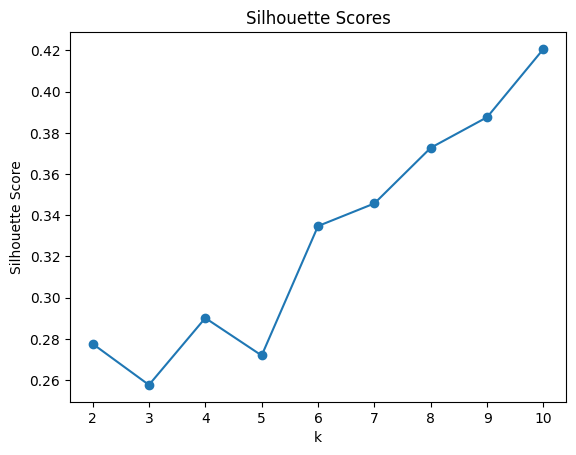

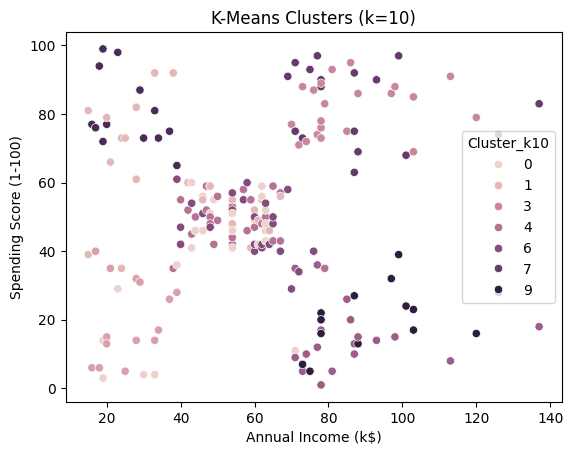

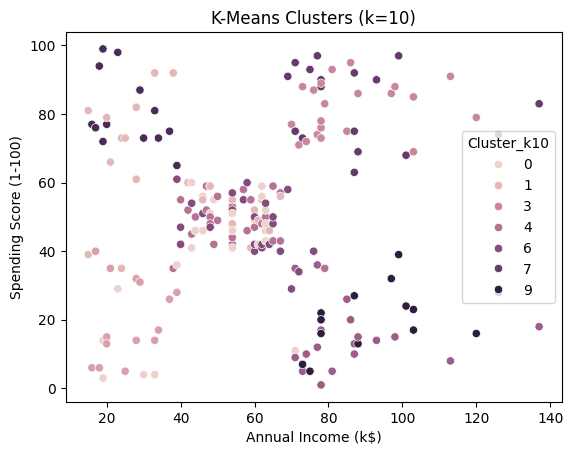


===== Summary for k = 10 =====
                   Age  Annual Income (k$)  Spending Score (1-100)  Genre_Male
Cluster_k10                                                                   
0            58.846154           48.692308               39.846154    1.000000
1            25.250000           41.250000               60.916667    1.000000
2            41.214286           26.071429               20.142857    0.071429
3            32.190476           86.047619               81.666667    0.000000
4            54.153846           54.230769               48.961538    0.000000
5            38.473684           85.894737               14.210526    1.000000
6            27.960000           57.360000               47.120000    0.000000
7            33.277778           87.111111               82.666667    1.000000
8            25.461538           25.692308               80.538462    0.000000
9            43.785714           93.285714               20.642857    0.000000

===== Summary for k

In [12]:
#Question 1a
# ==========================================
# 1. IMPORT LIBRARIES
# ==========================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


# ==========================================
# 2. GAP STATISTIC FUNCTION (Pure Python, works everywhere)
# ==========================================
def gap_statistic(X, refs=10, max_clusters=10, random_state=42):
    np.random.seed(random_state)
    shape = X.shape
    tops = X.max(axis=0)
    bottoms = X.min(axis=0)
    dists = np.zeros((refs, shape[0], shape[1]))

    # Create reference datasets
    for i in range(refs):
        dists[i] = np.random.uniform(bottoms, tops, size=shape)

    gaps = []
    for k in range(1, max_clusters + 1):
        km = KMeans(n_clusters=k, random_state=random_state).fit(X)
        disp = km.inertia_

        ref_disps = np.zeros(refs)
        for i in range(refs):
            km_ref = KMeans(n_clusters=k, random_state=random_state).fit(dists[i])
            ref_disps[i] = km_ref.inertia_

        gap = np.log(np.mean(ref_disps)) - np.log(disp)
        gaps.append(gap)

    optimal_k = np.argmax(gaps) + 1
    return optimal_k, gaps


# ==========================================
# 3. LOAD DATA
# ==========================================
df = pd.read_csv("/content/Mall_Customers.csv")

# One-hot encode Genre → creates Genre_Male
df_encoded = pd.get_dummies(df, columns=["Genre"], drop_first=True)


# ==========================================
# 4. FEATURE PREPARATION
# ==========================================
features = ["Age", "Annual Income (k$)", "Spending Score (1-100)", "Genre_Male"]

X = df_encoded[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# ==========================================
# 5. GAP STATISTIC
# ==========================================
n_clusters_gap, gaps = gap_statistic(X_scaled, refs=10, max_clusters=10)
print("Optimal k (Gap Statistic):", n_clusters_gap)

plt.plot(range(1, 11), gaps, marker='o')
plt.xlabel("k")
plt.ylabel("Gap Value")
plt.title("Gap Statistic")
plt.show()


# ==========================================
# 6. SILHOUETTE SCORE
# ==========================================
sil_scores = []
K = range(2, 11)

for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(X_scaled)
    sil_scores.append(silhouette_score(X_scaled, labels))

ksil = K[np.argmax(sil_scores)]
print("Optimal k (Silhouette Score):", ksil)

plt.plot(K, sil_scores, marker="o")
plt.xlabel("k")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores")
plt.show()


# ==========================================
# 7. FIT K-MEANS USING df_encoded
# ==========================================
k_values = [n_clusters_gap, ksil]

for k in k_values:
    km = KMeans(n_clusters=k, random_state=42)
    df_encoded[f"Cluster_k{k}"] = km.fit_predict(X_scaled)


# ==========================================
# 8. PLOT CLUSTERS
# ==========================================
for k in k_values:
    sns.scatterplot(
        data=df_encoded,
        x="Annual Income (k$)",
        y="Spending Score (1-100)",
        hue=f"Cluster_k{k}"
    )
    plt.title(f"K-Means Clusters (k={k})")
    plt.show()


# ==========================================
# 9. CLUSTER SUMMARY STATISTICS
# ==========================================
for k in k_values:
    print("\n===== Summary for k =", k, "=====")
    print(
        df_encoded.groupby(f"Cluster_k{k}")[
            ["Age", "Annual Income (k$)", "Spending Score (1-100)", "Genre_Male"]
        ].mean()
    )


##1a.
### ii
The scatterplots for k = 10 show distinct regions where spending score and income combine to form identifiable customer groups. High-income/high-spending customers cluster cleanly in the upper-right region, while low-income/low-spending customers cluster in the lower-left. However, as k increases, some clusters become more granular and begin to overlap, indicating that while k = 10 does separate major behavior patterns, it also creates smaller subclusters that are not perfectly separable in two-dimensional space. Overall, the clusters show reasonable separability but with some overlap between middle-income, moderate-spending groups.

### iii
Overall, the k = 10 clustering reveals that customers are primarily differentiated by their income and spending patterns, with clear segments of high-income high-spenders, high-income low-spenders, low-income high-spenders, and low-income low-spenders. Younger customers tend to show more varied and sometimes impulsive spending behavior, while older customers generally spend less and follow more conservative patterns. There are also noticeable gender differences within some clusters, particularly among the highest and lowest spenders. Overall, the clusters capture meaningful variations in behavior that reflect distinct shopping profiles within the mall’s customer base.


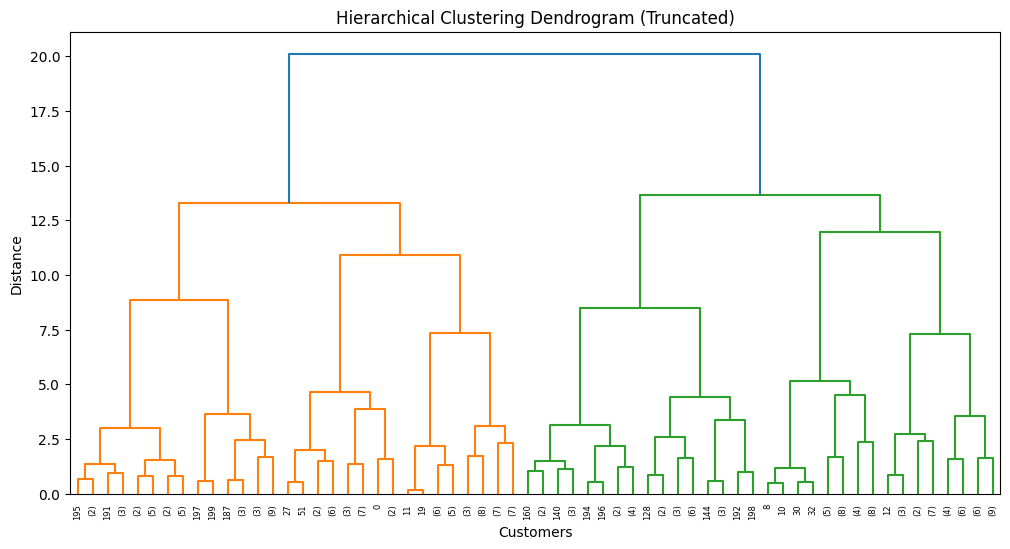

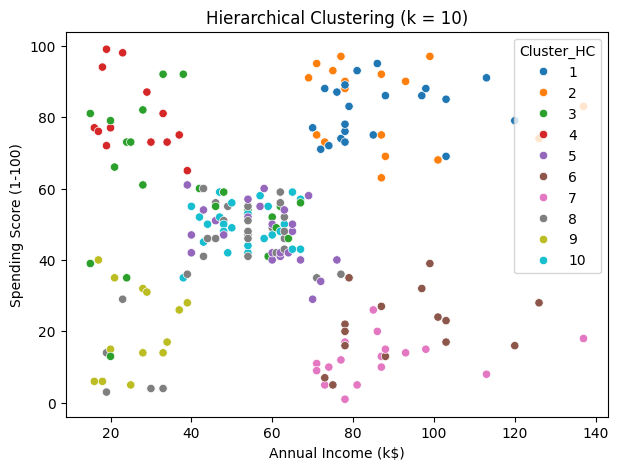

                  Age  Annual Income (k$)  Spending Score (1-100)  Genre_Male
Cluster_HC                                                                   
1           32.190476           86.047619               81.666667         0.0
2           33.277778           87.111111               82.666667         1.0
3           24.565217           39.217391               59.652174         1.0
4           25.461538           25.692308               80.538462         0.0
5           27.960000           57.360000               47.120000         0.0
6           44.600000           92.333333               21.600000         0.0
7           38.833333           86.388889               11.666667         1.0
8           56.551724           50.034483               41.344828         1.0
9           41.538462           26.538462               20.692308         0.0
10          54.080000           53.240000               49.520000         0.0


In [13]:
#Question 1b

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Perform hierarchical clustering using Ward linkage
Z = linkage(X_scaled, method='ward')

# Plot dendrogram
plt.figure(figsize=(12, 6))
dendrogram(Z, truncate_mode='level', p=5)
plt.title("Hierarchical Clustering Dendrogram (Truncated)")
plt.xlabel("Customers")
plt.ylabel("Distance")
plt.show()

# Choose k = 10 to match K-Means
k_hier = 10
df_encoded["Cluster_HC"] = fcluster(Z, k_hier, criterion='maxclust')

# Plot income vs spending score
plt.figure(figsize=(7,5))
sns.scatterplot(
    data=df_encoded,
    x="Annual Income (k$)",
    y="Spending Score (1-100)",
    hue="Cluster_HC",
    palette="tab10"
)
plt.title("Hierarchical Clustering (k = 10)")
plt.show()

print(df_encoded.groupby("Cluster_HC")[
    ["Age", "Annual Income (k$)", "Spending Score (1-100)", "Genre_Male"]
].mean())


##1b.
### ii
The hierarchical clustering scatterplot shows similar overall patterns to K-Means, with clear high-income/high-spending and low-income/low-spending groups. However, the hierarchical clusters are less compact and show more overlap because hierarchical clustering does not optimize cluster tightness the way K-Means does. K-Means produces cleaner, more separated clusters, while hierarchical clustering yields more irregular shapes and cluster sizes.
### iii
The hierarchical clustering groups largely mirror the behavioral patterns seen in K-Means. There are high-income/high-spending clusters (Clusters 1–2), low-income/high-spending shoppers (Cluster 4), and high-income but low-spending customers (Clusters 6–7). Middle-income moderate spenders also form several clusters (5, 8, 10). Younger customers split into high- or moderate-spending groups, while older customers tend to fall into moderate-spending clusters. Overall, hierarchical clustering identifies similar customer segments but organizes them slightly differently due to the linkage-based clustering process.

### Question 2

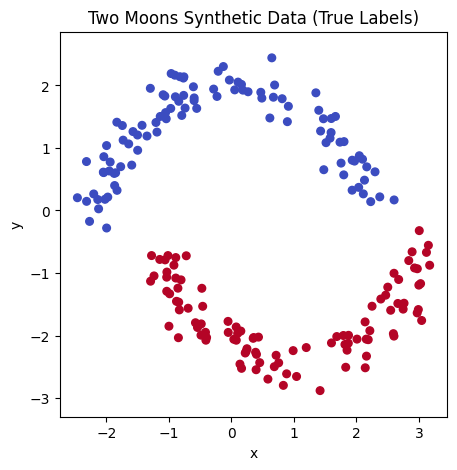

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, SpectralClustering

# For reproducibility
np.random.seed(598)

n = 200
n_per_moon = n // 2
r = 2
noise_var = 0.05
noise_std = np.sqrt(noise_var)

# ---------- Upper moon (label 0) ----------
theta1 = np.random.uniform(0, np.pi, n_per_moon)
x1 = r * np.cos(theta1) + np.random.normal(0, noise_std, n_per_moon)
y1 = r * np.sin(theta1) + np.random.normal(0, noise_std, n_per_moon)
label1 = np.zeros(n_per_moon, dtype=int)

# ---------- Lower moon (label 1) ----------
theta2 = np.random.uniform(0, np.pi, n_per_moon)
x2 = 1 - r * np.cos(theta2) + np.random.normal(0, noise_std, n_per_moon)
y2 = -r * np.sin(theta2) - 0.5 + np.random.normal(0, noise_std, n_per_moon)
label2 = np.ones(n_per_moon, dtype=int)

# ---------- Combine ----------
X = np.vstack([np.column_stack([x1, y1]), np.column_stack([x2, y2])])
y = np.concatenate([label1, label2])

df_moons = pd.DataFrame({"x": X[:, 0], "y": X[:, 1], "label": y})

# Plot the true labels
plt.figure(figsize=(5,5))
plt.scatter(df_moons["x"], df_moons["y"], c=df_moons["label"], cmap="coolwarm", s=30)
plt.title("Two Moons Synthetic Data (True Labels)")
plt.xlabel("x")
plt.ylabel("y")
plt.axis("equal")
plt.show()


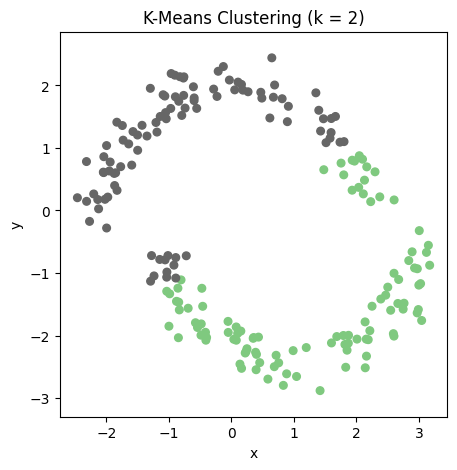

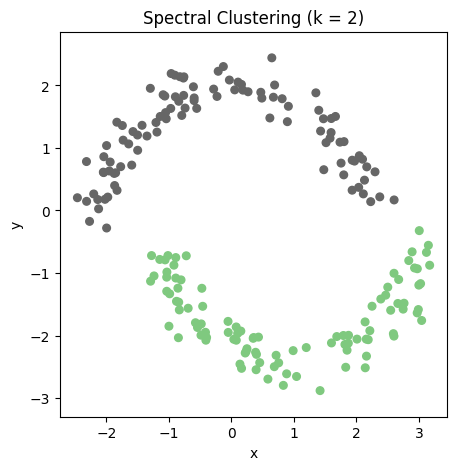

In [15]:
# 2a
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
df_moons["kmeans_cluster"] = kmeans.fit_predict(X)

plt.figure(figsize=(5,5))
plt.scatter(df_moons["x"], df_moons["y"],
            c=df_moons["kmeans_cluster"], cmap="Accent", s=30)
plt.title("K-Means Clustering (k = 2)")
plt.xlabel("x")
plt.ylabel("y")
plt.axis("equal")
plt.show()

#2b

spec = SpectralClustering(
    n_clusters=2,
    affinity="rbf",          # Gaussian / RBF kernel
    assign_labels="kmeans",
    random_state=42
)
df_moons["spectral_cluster"] = spec.fit_predict(X)

plt.figure(figsize=(5,5))
plt.scatter(df_moons["x"], df_moons["y"],
            c=df_moons["spectral_cluster"], cmap="Accent", s=30)
plt.title("Spectral Clustering (k = 2)")
plt.xlabel("x")
plt.ylabel("y")
plt.axis("equal")
plt.show()


### 2a
Using K-Means with  k=2 on the two-moons data does not correctly recover the true structure. Because K-Means assumes clusters are convex and roughly spherical, it places a straight decision boundary through the middle of the dataset. As a result, the two curved moon shapes are mixed: some points from the upper moon are grouped with the lower moon and vice versa. The algorithm fails to capture the non-linear geometry of the moons, leading to poor separation between the two true groups.


### 2b
Spectral clustering with an RBF kernel successfully recovers the two moon shapes. Unlike K-Means, it uses a similarity graph and embeds the data into a lower-dimensional space where the moons become linearly separable. The resulting clusters align almost perfectly with the true labels, cleanly separating the top and bottom moon structures. Compared to part (a), spectral clustering handles the non-linear boundary correctly and produces a much more accurate clustering.